In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy as scp
from scipy.linalg import cholesky
import sympy
sympy.init_printing()
def display_matrix(m):
    display(sympy.Matrix(m))
%matplotlib inline

In [7]:
m = np.array([0,0])
n = np.array([[1,0.6],[0.6,1]])
y = ss.multivariate_normal.rvs(mean =m , cov =n,size =1000000 )

In [8]:
y

array([[ 0.67398393, -0.43189202],
       [ 1.00921898,  1.36250892],
       [-0.4586725 ,  0.86430875],
       ...,
       [ 0.34448308,  0.23437759],
       [-1.08835664, -1.62487382],
       [-1.07210187,  0.48946443]])

In [9]:
y1 = np.random.normal(loc=0,scale=1,size=1000000)
y2 = 0.6*y1 + np.sqrt(1-0.36)*np.random.normal(loc=0,scale=1,size=1000000)

In [10]:
display_matrix(np.corrcoef(y1,y2).round(2))
display_matrix(cholesky(n))
cholesky(n,lower= True)

/Users/rohithkumaralaparthi/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/rohithkumaralaparthi/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/rohithkumaralaparthi/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/rohithkumaralaparthi/opt/anacon

⎡1.0  0.6⎤
⎢        ⎥
⎣0.6  1.0⎦

⎡1.0  0.6⎤
⎢        ⎥
⎣ 0   0.8⎦

array([[1. , 0. ],
       [0.6, 0.8]])

In [13]:
np.random.seed(42)
N = 1000000 
paths = 6
T = 1
T_vec, dt = np.linspace(0, T, N, retstep=True)
dt_sq = np.sqrt(dt)

S0 = 100  
X0 = np.log(S0)  
v0 = 0.04 
Y0 = np.log(v0)

mu = 0.1  
rho = -0.2  
kappa = 2  
theta = 0.04  
sigma = 0.3  
std_asy = np.sqrt(theta * sigma**2 / (2 * kappa))  
assert 2 * kappa * theta > sigma**2  

MU = np.array([0, 0])
COV = np.matrix([[1, rho], [rho, 1]])
W = ss.multivariate_normal.rvs(mean=MU, cov=COV, size=(paths, N - 1))
W_S = W[:, :, 0]  
W_v = W[:, :, 1]  

Y = np.zeros((paths, N))
Y[:, 0] = Y0
X = np.zeros((paths, N))
X[:, 0] = X0
v = np.zeros(N)


for t in range(0, N - 1):
    v = np.exp(Y[:, t])  
    v_sq = np.sqrt(v)  
    Y[:, t + 1] = (
        Y[:, t] + (1 / v) * (kappa * (theta - v) - 0.5 * sigma**2) * dt + sigma * (1 / v_sq) * dt_sq * W_v[:, t]
    )
    X[:, t + 1] = X[:, t] + (mu - 0.5 * v) * dt + v_sq * dt_sq * W_S[:, t]

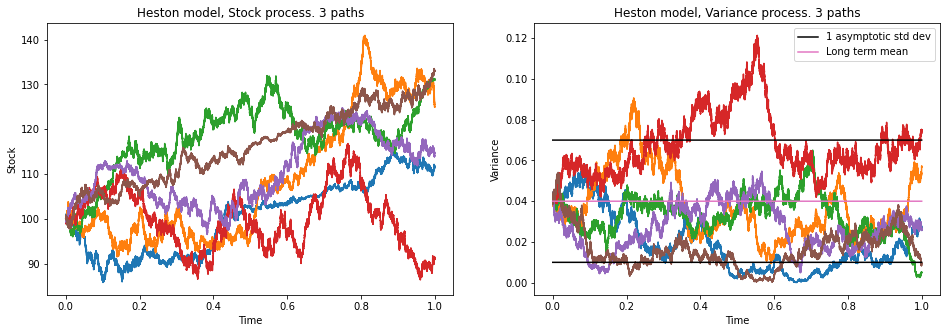

In [14]:
fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(T_vec, np.exp(X.T))
ax1.set_title("Heston model, Stock process. 3 paths")
ax1.set_xlabel("Time")
ax1.set_ylabel("Stock")
ax2.plot(T_vec, np.exp(Y.T))
ax2.set_title("Heston model, Variance process. 3 paths")
ax2.set_xlabel("Time")
ax2.set_ylabel("Variance")
ax2.plot(T_vec, (theta + std_asy) * np.ones_like(T_vec), label="1 asymptotic std dev", color="black")
ax2.plot(T_vec, (theta - std_asy) * np.ones_like(T_vec), color="black")
ax2.plot(T_vec, theta * np.ones_like(T_vec), label="Long term mean")
ax2.legend(loc="upper right")
plt.show()